# Análisis de hipótesis 

## Importar librerías 

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

## Cargar datos

In [124]:
hip_histor = pd.read_csv('./datasets/hypotheses_us.csv', sep=';')
ordenes_df = pd.read_csv('./datasets/orders.csv')
vicitas_df = pd.read_csv('./datasets/visits_us.csv')

## Preparación de datos

In [125]:
print(hip_histor.info())
print()
print(hip_histor.head())
print()
print(hip_histor.isna().sum())
print()
print(hip_histor.duplicated().sum())     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           

In [126]:
#poner nombre de columnas en minusculas
hip_histor.columns = map(str.lower, hip_histor.columns)

In [127]:
print(ordenes_df.info())
print(ordenes_df.head())
print()
print(ordenes_df.isna().sum())
print()
print(ordenes_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

0


In [128]:
ordenes_df.columns = map(str.lower,ordenes_df.columns)

In [129]:
ordenes_df['date']=pd.to_datetime(ordenes_df['date'])

In [130]:
print(vicitas_df.info())
print(vicitas_df.head())
print()
print(vicitas_df.isna().sum())
print()
print(vicitas_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756

date      0
group     0
visits    0
dtype: int64

0


In [131]:
vicitas_df['date']=pd.to_datetime(vicitas_df['date'])

## Priorizar hipótesis

### Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [132]:
hip_histor['ICE'] =(hip_histor['impact']*hip_histor['confidence']/hip_histor['effort'])

print(hip_histor[['hypothesis', 'ICE']].sort_values(by= 'ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


### Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [133]:
hip_histor['RICE'] = (hip_histor['reach']* hip_histor['impact']*hip_histor['confidence'])/hip_histor['effort']

print(hip_histor[['hypothesis','RICE']].sort_values(by= 'RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

##### **Los cambios son significativos ya que si bien en ICE son 8,  0 y 7 las hipótesis mas fuetes, sin embargo podemos darnos cuenta que en RICE el 7 toma la delantera por una mayor puntuacion. En custion de datos nos damos cuenta que la que tiene un mayor impacto es la cero, mientras que la que tiene un mayor alcance en los usuarios es la 7. 

## Análisis del test A/B

### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [134]:
datesGroups = ordenes_df[['date','group']].drop_duplicates()
ordenAggregated = datesGroups.apply(lambda x: ordenes_df[np.logical_and(ordenes_df['date'] <= x['date'],ordenes_df['group']== x['group'])].agg({'date': 'max', 'group': 'max','transactionid':pd.Series.nunique,'visitorid': pd.Series.nunique, 'revenue': 'sum'}),axis=1).sort_values(by= ['date','group'])
visitasAggregated = datesGroups.apply(lambda x: vicitas_df[np.logical_and(vicitas_df['date'] <= x['date'], vicitas_df['group'] == x['group'])].agg({'date':'max','group':'max', 'visits': 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [135]:
cumulativeData = ordenAggregated.merge(visitasAggregated, left_on=['date', 'group'], right_on =['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

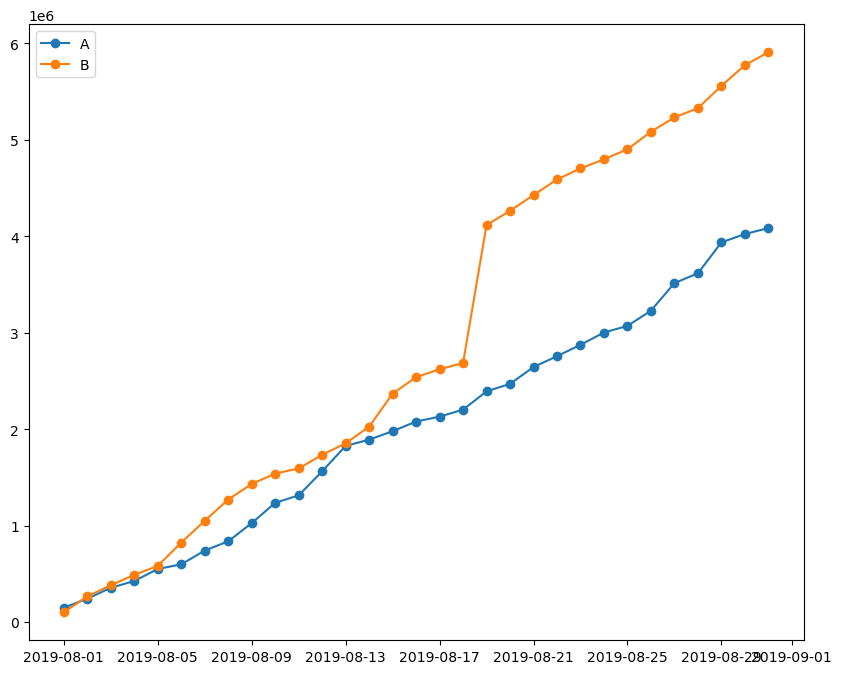

In [136]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.subplots(figsize=(10,8))

plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label ='A', marker='o')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'],label = 'B', marker='o')

plt.legend()

##### **En conclusión  en cierto punto las dos pruevas llevaban un nivel muy parejo siendo la "a" la que tomo delantera, mientras que al avanzar la "b"  concluyo con  un nivel superior. 

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

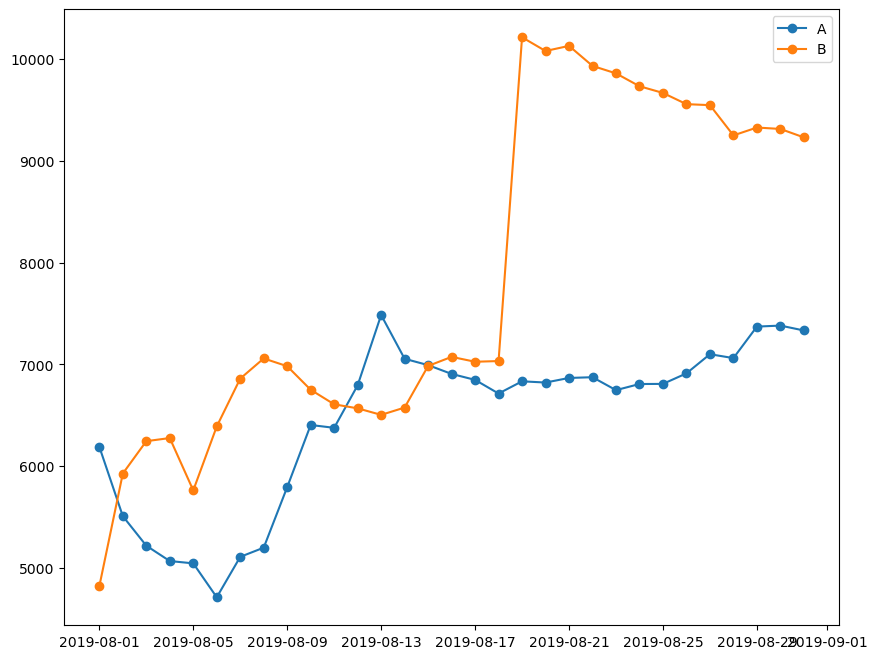

In [137]:
plt.subplots(figsize=(10,8))
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],label='A', marker='o',)
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],label='B', marker='o')
plt.legend()

##### **Los datos aun son muy ambiguos ya que  la "A" mantiene un nivel muy praticular a diferencia de "B" que maneja un estilo rebote y termina ligeramente superando "A".

### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

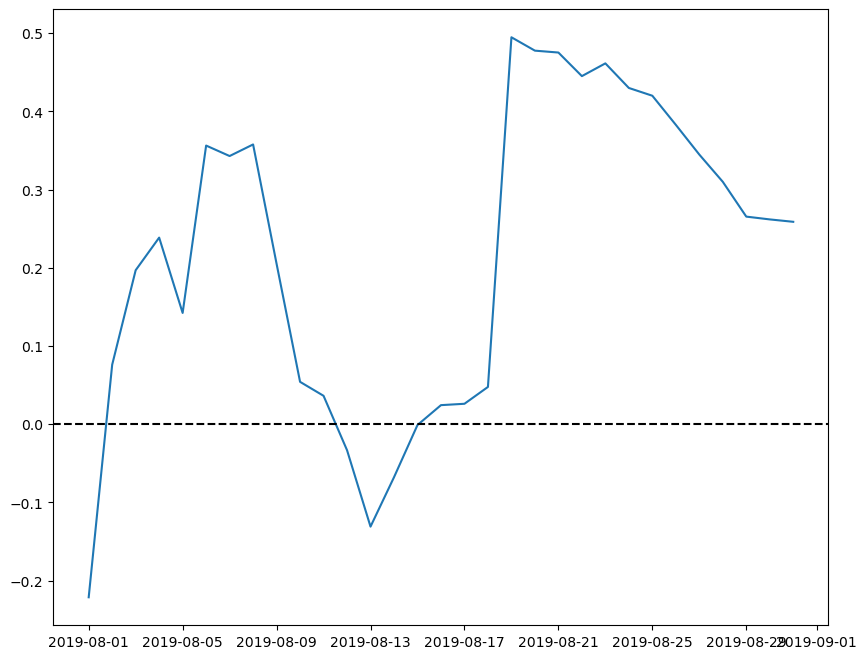

In [138]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on='date', how='left', suffixes=['A', 'B'])
plt.subplots(figsize=(10,8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

##### **Contamos con un crecimiento hacelerado en un  principio, el cual decae repentinamente, para posteriormente volver a subir. y tomar mayor estabilidad. 

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

<function matplotlib.pyplot.show(close=None, block=None)>

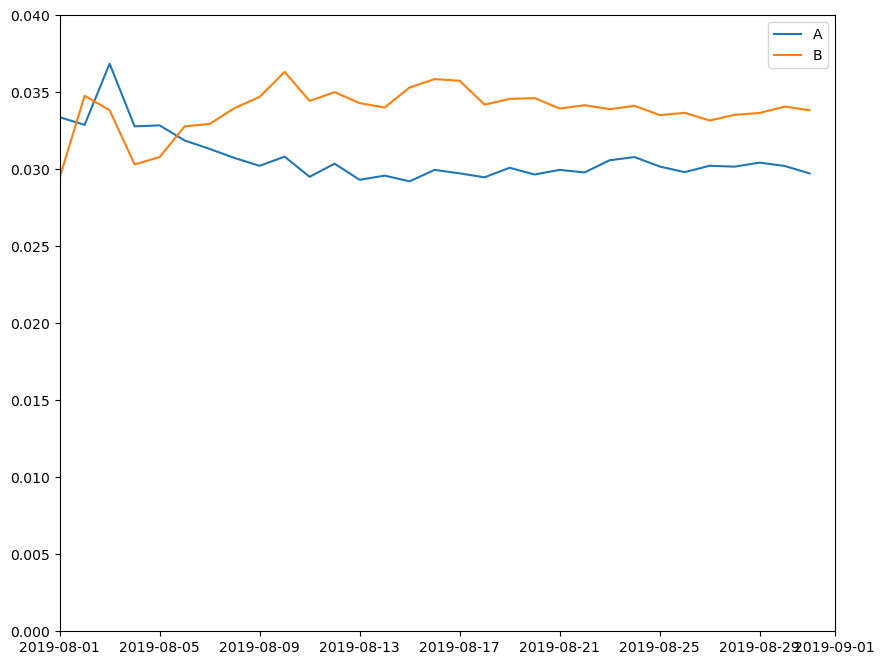

In [139]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.subplots(figsize=(10,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.legend()
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-09-01'), 0, 0.04])
plt.show

##### **Nuestra prueva "B"  es genuina mente mas alta al final , siendo que inicio relativamente mas abajo.

### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

 

In [140]:
ordersByUsers = (
   ordenes_df.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorid', 'orders']

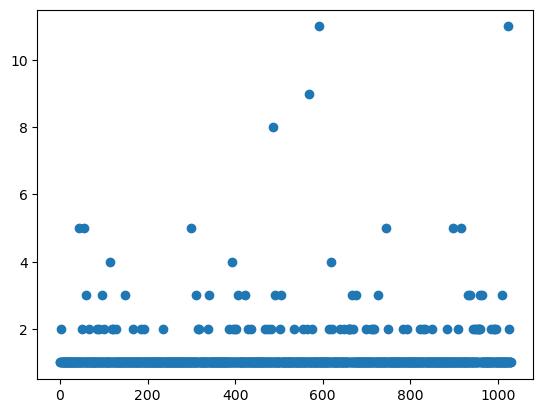

In [141]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

##### **La mayoria de los usuarios solo realizan un pedido, tenemos algunos usuarios que realizan mas, solo que son muy esporadicoas despues de 3 pedidos.

### Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [142]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.


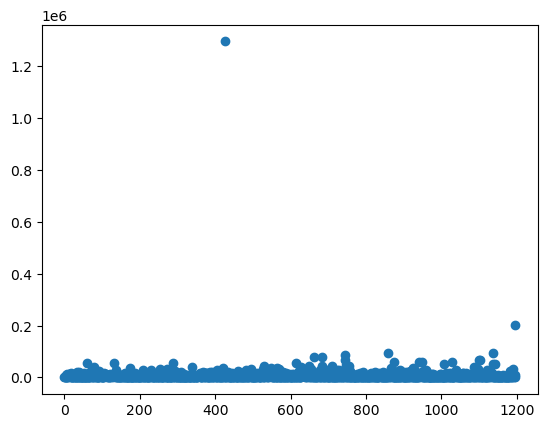

In [143]:
x_values = pd.Series(range(0,len(ordenes_df['revenue'])))

plt.scatter(x_values, ordenes_df['revenue'])

##### **La mayoría de nuestros valores se encuentran estable teniendo dos valores relativamente atípicos.

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [144]:
print(np.percentile(ordenes_df['revenue'], [95, 99]))

[28000.  58233.2]


### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [151]:
ordersByUsersA = (ordenes_df[ordenes_df['group']=='A'].groupby('visitorid',as_index = False).agg({'transactionid':pd.Series.nunique}))
ordersByUsersA.columns = ['visitors', 'orders']

ordersByUsersB = (ordenes_df[ordenes_df['group']=='B'].groupby('visitorid',as_index = False).agg({'transactionid':pd.Series.nunique}))
ordersByUsersB.columns = ['visitors', 'orders']

In [157]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(vicitas_df[vicitas_df['group']== 'A']['visits'].sum()-len(ordersByUsersA['orders'])), name='orders')],axis=0,)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(vicitas_df[vicitas_df['group']== 'B']['visits'].sum()-len(ordersByUsersB['orders'])), name='orders')],axis=0,)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.01679
0.138


##### **El porcentaje del casi 13% es haceptable para el proceso"B"

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [158]:
print('{0:.3f}'.format(stats.mannwhitneyu(ordenes_df[ordenes_df['group']=='A']['revenue'], ordenes_df[ordenes_df['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(ordenes_df[ordenes_df['group']=='B']['revenue'].mean()/ordenes_df[ordenes_df['group']=='A']['revenue'].mean()-1))

0.729
0.259


#####  **La ganancia relativa es del 25%, mientras que el tamaño promedio de las compras es de casi 73% , es bastante haceptable el porcentaje en ambas.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [177]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 2]['visitors'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitors'],
                                                                              ], axis = 0)
                                                                                                                                                                                                                                                                    
usersWithExpensiveOrders = ordenes_df[ordenes_df['revenue'] > 10000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [187]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitors'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(vicitas_df[vicitas_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitors'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(vicitas_df[vicitas_df['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00896
0.205


##### **La prueva B sigue teniendo un valor significateivamente alto en comparacion con A aunque , la diferncia entre los datos filtrados y los datos brutos en A tienen una disminucion. 

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [183]:
print("{0:.3f}".format(stats.mannwhitneyu(
    ordenes_df[np.logical_and(ordenes_df['group']=='A',
                               np.logical_not(ordenes_df['visitorid'].isin(abnormalUsers)))]['revenue'], 
    ordenes_df[np.logical_and(
        ordenes_df['group']=='B',
        np.logical_not(ordenes_df['visitorid'].isin(abnormalUsers)))]['revenue']
)[1]))

print("{0:.3f}".format(ordenes_df[np.logical_and(ordenes_df['group']=='B',  
                                                 np.logical_not(ordenes_df['visitorid'].isin(abnormalUsers)))]['revenue'].mean() /  
                                                 ordenes_df[np.logical_and(ordenes_df['group']=='A',  
                                                                           np.logical_not(ordenes_df['visitorid'].isin(abnormalUsers)))]
                                                                           ['revenue'].mean() - 1))


0.965
0.002


##### **El promedio se redujo significtivamente, tanto como la ganancia relativa es decir que los valores atipicos si generaban una diferencia que producia inestabilidad en los datos.

### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

##### **Deacuerdo con los resultados obtenidos tomaremos la decisión de continuar con la prueva ya que tiene un funcionamiento importante para la empresa.